In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv('tune_random_forest.csv')
df.shape

(96, 4)

In [6]:
df.columns

Index(['feature', 'depth', 'trees', 'rmse'], dtype='object')

In [7]:
print("features {}".format(df['feature'].value_counts().to_dict().keys()))
print("depth {}".format(list(df['depth'].value_counts().to_dict().keys())))
print("trees {}".format(list(df['trees'].value_counts().to_dict().keys())))


features dict_keys(['rdkit', 'cdk'])
depth [30, 20, 15, 10, 5, 2]
trees [70, 60, 50, 40, 30, 20, 10, 5]


In [8]:
df['rmse'].describe()

count    96.000000
mean      0.541717
std       0.053159
min       0.480349
25%       0.503065
50%       0.522086
75%       0.563156
max       0.665804
Name: rmse, dtype: float64

In [9]:
df.ix[df['rmse'].idxmin()]

feature       rdkit
depth            30
trees            40
rmse       0.480349
Name: 92, dtype: object

In [10]:
rdkit = df.loc[df['feature'] == 'rdkit']
rdkit.shape

(48, 4)

In [11]:
cdk = df.loc[df['feature'] == 'cdk']
cdk.shape

(48, 4)

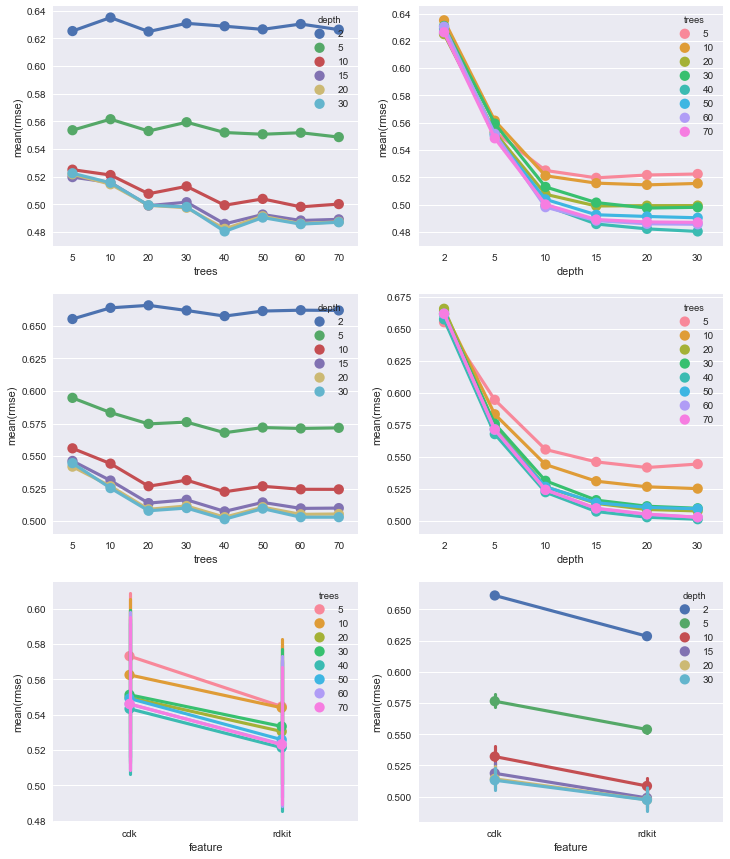

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

sns.pointplot(x='trees', y='rmse', hue='depth', data=rdkit, ax=axes[0][0])
sns.pointplot(x='depth', y='rmse', hue='trees', data=rdkit, ax=axes[0][1])

sns.pointplot(x='trees', y='rmse', hue='depth', data=cdk, ax=axes[1][0])
sns.pointplot(x='depth', y='rmse', hue='trees', data=cdk, ax=axes[1][1])

sns.pointplot(x='feature', y='rmse', hue='trees', data=df, ax=axes[2][0])
sns.pointplot(x='feature', y='rmse', hue='depth', data=df, ax=axes[2][1])

In [13]:
rdkit['rmse'].describe()

count    48.000000
mean      0.530780
std       0.049612
min       0.480349
25%       0.496255
50%       0.513721
75%       0.552196
max       0.635120
Name: rmse, dtype: float64

In [14]:
cdk['rmse'].describe()

count    48.000000
mean      0.552653
std       0.054830
min       0.501514
25%       0.510063
50%       0.526842
75%       0.572623
max       0.665804
Name: rmse, dtype: float64